<a href="https://www.kaggle.com/code/surajthakur21/face-mask-detection?scriptVersionId=232179061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']


In [4]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']


In [5]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


In [6]:
#  create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
labels = with_mask_labels + without_mask_labels

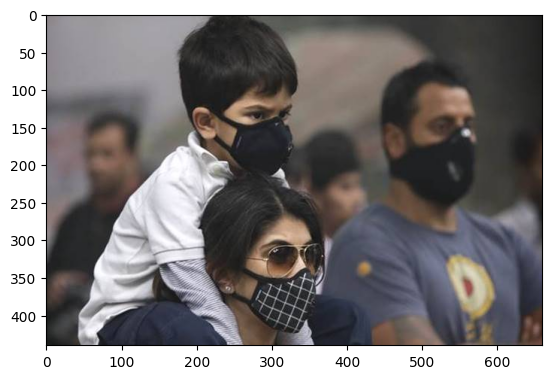

In [8]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3316.jpg')
imgplot = plt.imshow(img)

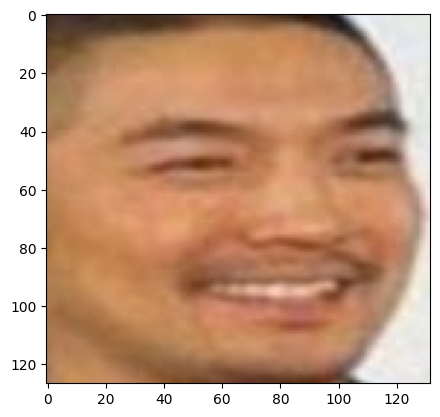

In [9]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3316.jpg')
imgplot = plt.imshow(img)

# Image Processing

1. Resize the Images
2. Convert the Images to numpy arrays

In [10]:
#  Convert Images to numpy arrays

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img_file in without_mask_files:

    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
type(data)

list

In [12]:
len(data)

7553

In [13]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [14]:
type(data[0])

numpy.ndarray

In [15]:
data[0].shape

(128, 128, 3)

In [16]:
#  Converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [17]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [20]:
#  Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [21]:
X_train[0]

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)

In [22]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

# Building a Convolutional Neural Network (CNN)

In [23]:
import tensorflow as tf 
from tensorflow import keras

In [24]:
num_of_classes =2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#  Compile the neural network 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc']
             )

In [26]:
# Training the neural network 

history = model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - acc: 0.6814 - loss: 0.6756 - val_acc: 0.9074 - val_loss: 0.2170
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8797 - loss: 0.3056 - val_acc: 0.9174 - val_loss: 0.2172
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8992 - loss: 0.2501 - val_acc: 0.9256 - val_loss: 0.1626
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9177 - loss: 0.2007 - val_acc: 0.9322 - val_loss: 0.2099
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9302 - loss: 0.1893 - val_acc: 0.9471 - val_loss: 0.1495
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9437 - loss: 0.1422 - val_acc: 0.9421 - val_loss: 0.1601
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9627 - loss: 0.1057 - val_acc: 0.9504 - val_loss: 0.1624
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9602 - loss: 0.0974 - val_acc: 0.9471 - val_loss: 0.1658
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms

## Model Evaluation

In [27]:
loss , accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9233 - loss: 0.2596
Test Accuracy =  0.9238914847373962


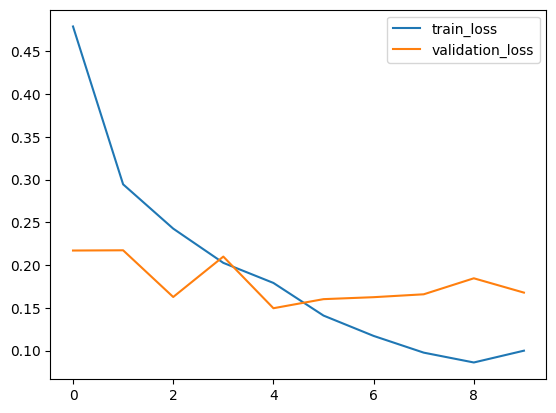

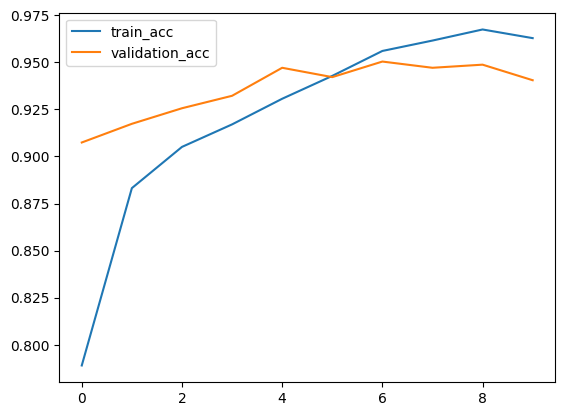

In [28]:
h = history 

# plot the loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train_acc')
plt.plot(h.history['val_acc'], label='validation_acc')
plt.legend()
plt.show()

## Predictive System

In [29]:
# input_image_path = input('Path of the image to be predicted: ')

# input_image = cv2.imread(input_image_path)

# img_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# plt.imshow(img_rgb)
# plt.axis('off')  # Hide axes for cleaner display
# plt.show()

# input_image_resized = cv2.resize(input_image, (128,128))

# input_image_scaled = input_image_resized/255

# input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

# input_prediction = model.predict(input_image_reshaped)

# print(input_prediction)

# input_pred_label = np.argmax(input_prediction)

# print(input_pred_label)

# if input_pred_label == 1:
    
#     print("The person in the image is wearing a mask")
    
# else:
    
#     print("The person in the image is not wearing a mask")
    